# Final Project | Traffic Sign Recognition

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1xJagemKQlUKMrWu42mMrH5qbnKATytFZ?usp=sharing)

Tham Khảo:  https://www.kaggle.com/kar0n7/traffic-signal-recognizer-98-accuracy

# Importing libraries

In [ ]:
! pip install visualkeras
import visualkeras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import zipfile
import tensorflow as tf
import pathlib

import warnings 
warnings.filterwarnings('ignore')

from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *

%matplotlib inline

     |████████████████████████████████| 795 kB 8.0 MB/s 


# Unzip

Link download data: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [ ]:
# Đường dẫn đến thư mục chứa tập dữ liệu
path = '/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/Final Project /Data'

In [ ]:
# with zipfile.ZipFile(path + '/archive.zip', 'r') as zip_ref:
#   zip_ref.extractall(path)

# Load the dataset

In [ ]:
# Name of Traffic Sign
classNames = {0: 'Speed limit (20km/h)',
              1: 'Speed limit (30km/h)',
              2: 'Speed limit (50km/h)',
              3: 'Speed limit (60km/h)',
              4: 'Speed limit (70km/h)',
              5: 'Speed limit (80km/h)',
              6: 'End of speed limit (80km/h)',
              7: 'Speed limit (100km/h)',
              8: 'Speed limit (120km/h)',
              9: 'No passing',
              10: 'No passing for vehicles over 3.5 metric tons',
              11: 'Right-of-way at the next intersection',
              12: 'Priority road',
              13: 'Yield',
              14: 'Stop',
              15: 'No vehicles',
              16: 'Vehicles over 3.5 metric tons prohibited',
              17: 'No entry',
              18: 'General caution',
              19: 'Dangerous curve to the left',
              20: 'Dangerous curve to the right',
              21: 'Double curve',
              22: 'Bumpy road',
              23: 'Slippery road',
              24: 'Road narrows on the right',
              25: 'Road work',
              26: 'Traffic signals',
              27: 'Pedestrians',
              28: 'Children crossing',
              29: 'Bicycles crossing',
              30: 'Beware of ice/snow',
              31: 'Wild animals crossing',
              32: 'End of all speed and passing limits',
              33: 'Turn right ahead',
              34: 'Turn left ahead',
              35: 'Ahead only',
              36: 'Go straight or right',
              37: 'Go straight or left',
              38: 'Keep right',
              39: 'Keep left',
              40: 'Roundabout mandatory',
              41: 'End of no passing',
              42: 'End of no passing by vehicles over 3.5 metric tons'}

## Load data train

Thời gian load data train khoảng 2 - 4 tiếng

In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu train
Train_path = path + '/Train'
# Number of Classes
Classes = len(os.listdir(Train_path))
print('Number of Classes:', Classes)

Number of Classes: 43


In [ ]:
# Định nghĩa hàm load data train từ drive lên google colab
def load_data(data_dir):
  images = list()
  labels = list()
  for category in range(Classes):
    categories = os.path.join(data_dir, str(category))
    for img in os.listdir(categories):
      img = load_img(os.path.join(categories, img), target_size=(30, 30))
      image = img_to_array(img)
      images.append(image)
      labels.append(category)
    
  return images, labels

In [ ]:
# Load data train
images, labels = load_data(Train_path)

In [ ]:
# One hot encoding the labels
labels = to_categorical(labels)

In [ ]:
# Splitting the dataset into training and test set
X_train, X_valid, Y_train, Y_valid = train_test_split(np.array(images), labels, train_size=0.8, random_state = 0)

In [ ]:
print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)

(31367, 30, 30, 3) (31367, 43)
(7842, 30, 30, 3) (7842, 43)


## Load data test

Thời gian load data train khoảng 1 - 2 tiếng

Lưu ý có thể gặp lỗi bị miss ảnh /Test/11031.png

In [ ]:
# Đường dẫn đến thư mục chứa dữ liệu test
Test = pd.read_csv(path + '/Test.csv')
test_labels = Test['ClassId'].values
test_images = Test['Path'].values

output = list()
# Load data test
for img in test_images:
  image = load_img(os.path.join(path, img), target_size=(30, 30))
  output.append(np.array(image))

X_test=np.array(output)

#Visualization the data

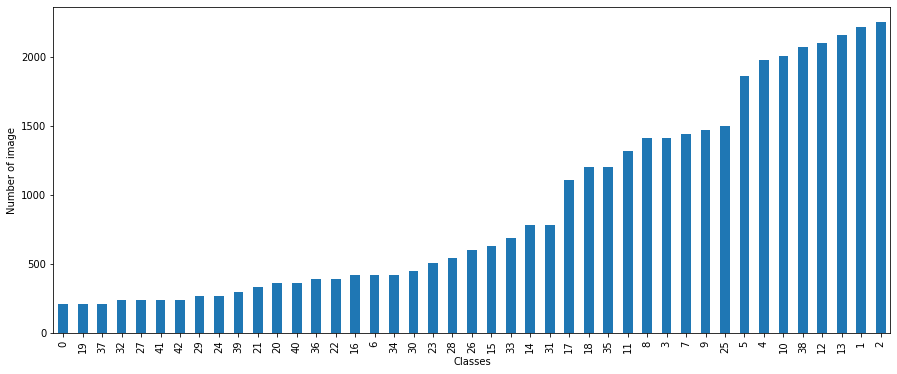

In [ ]:
# number of images in each class
data_dic = {}
for folder in os.listdir(Train_path):
  data_dic[folder] = len(os.listdir(Train_path + '/' + folder))

data_df = pd.Series(data_dic)
plt.figure(figsize = (15, 6))
data_df.sort_values().plot(kind = 'bar')
plt.xlabel('Classes')
plt.ylabel('Number of image')
plt.show()

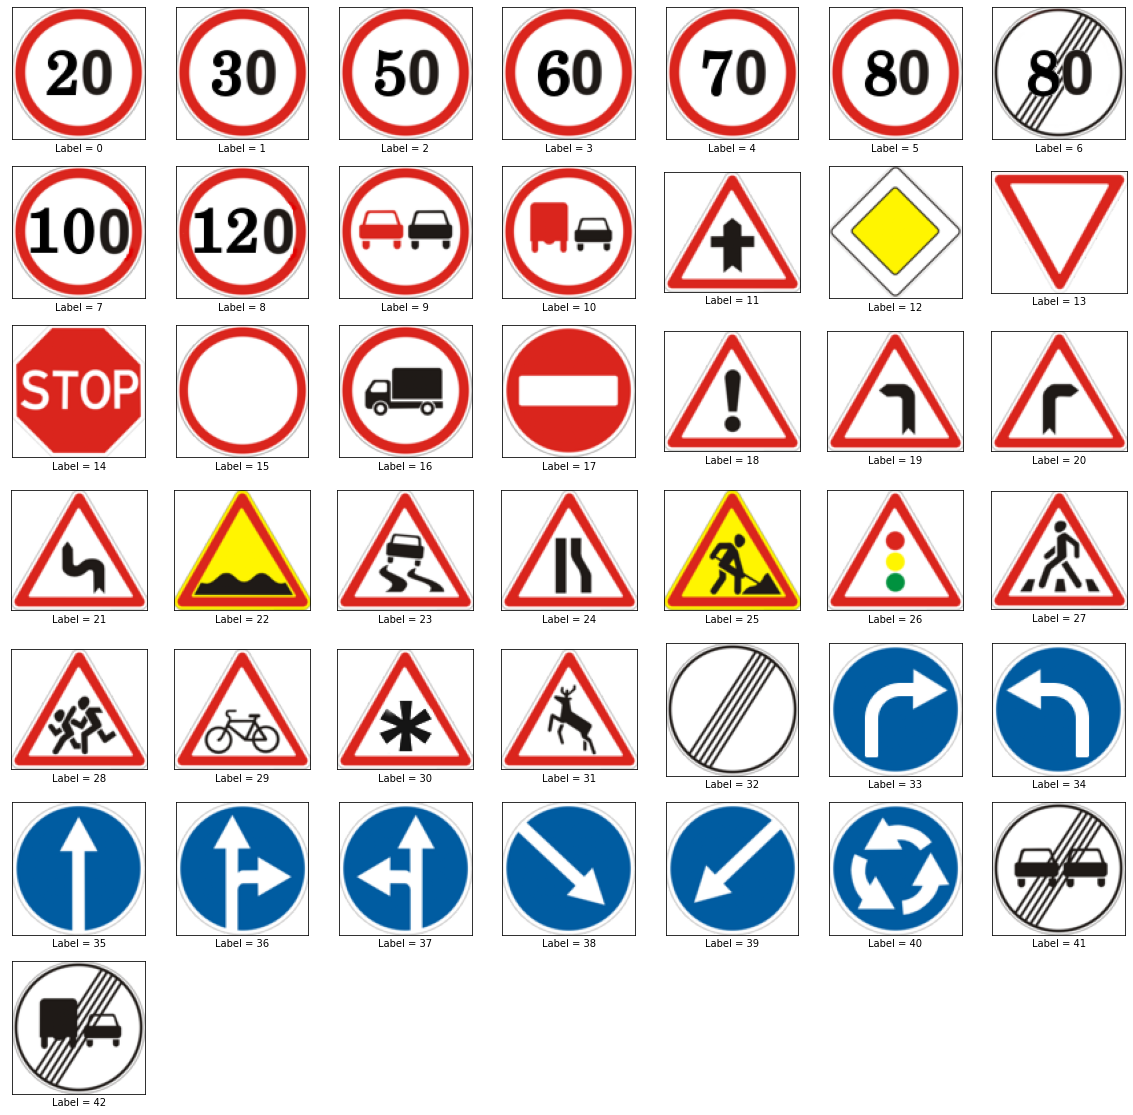

In [ ]:
# Visualizing all the different Signs  
plt.figure(figsize=(20, 20))
for i in range (0,43):
  plt.subplot(7,7,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  Path = path + '/meta/{}.png'.format(i)
  img = plt.imread(Path)
  plt.xlabel('Label = {}'.format(i))
  plt.imshow(img)

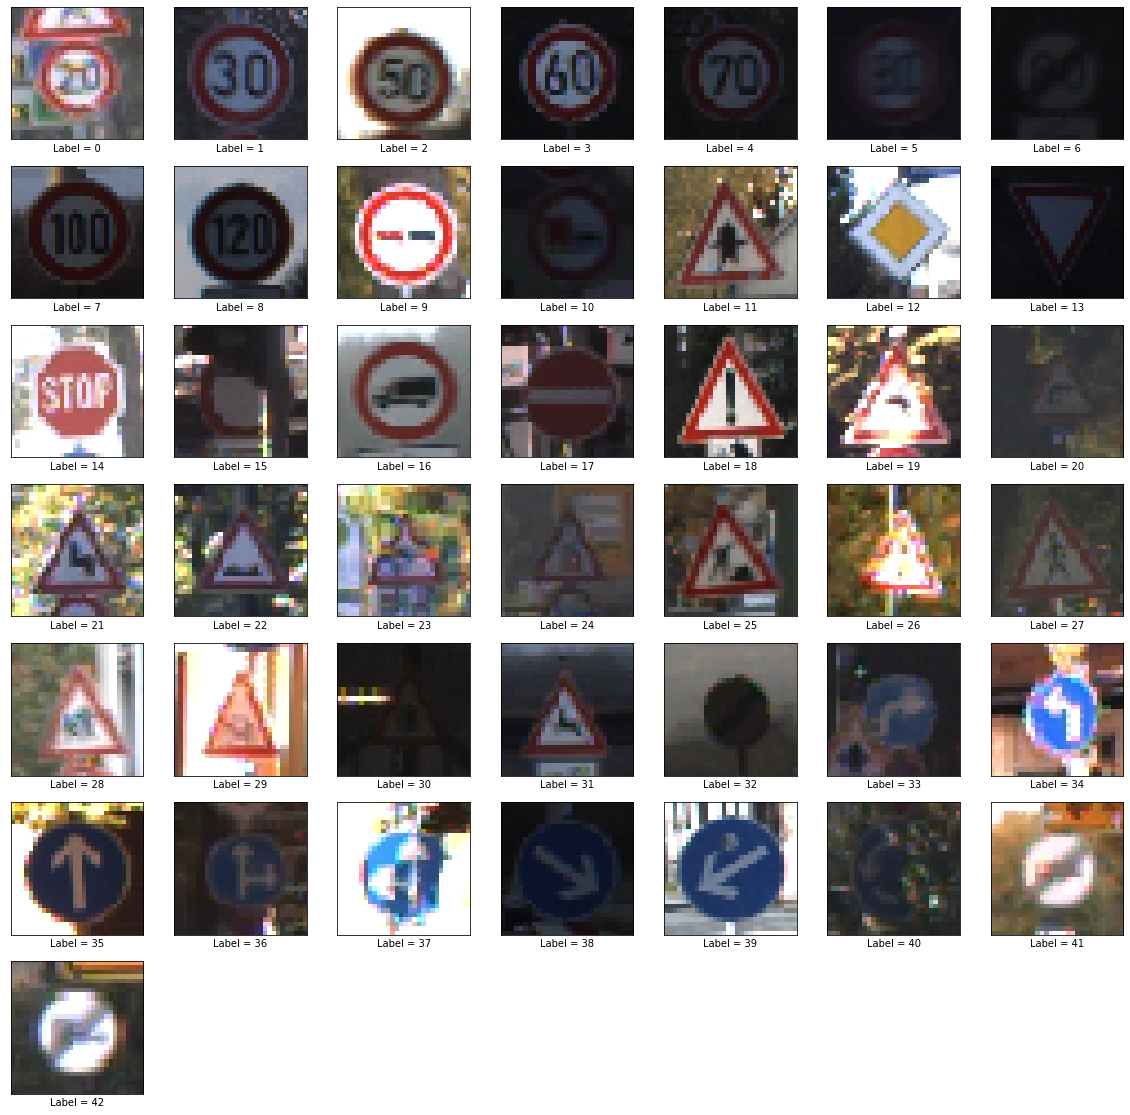

In [ ]:
# Visualizing all the different Signs
img_dir = pathlib.Path(Train_path)
plt.figure(figsize = (20,20))
index = 0
for i in range(Classes):
  plt.subplot(7, 7, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  sign = list(img_dir.glob(f'{i}/*'))[0]
  img = load_img(sign, target_size =  (30, 30))
  plt.xlabel('Label = {}'.format(i))
  plt.imshow(img)

plt.show()

# Construct Model

In [ ]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(30,30,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(Classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

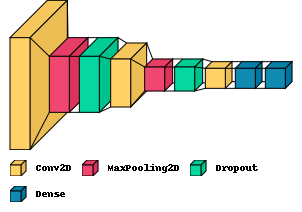

In [ ]:
visualkeras.layered_view(model, type_ignore=[layers.Flatten], legend=True)

#Training model

In [ ]:
# Compiling the model
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

# Fitting the model
history = model.fit(X_train, Y_train,
                    validation_data = (X_valid, Y_valid), 
                    epochs = 100, 
                    steps_per_epoch = 60)

Epoch 1/100
60/60 [==============================] - 36s 580ms/step - loss: 5.2294 - accuracy: 0.0528 - val_loss: 3.6263 - val_accuracy: 0.0937
Epoch 2/100
60/60 [==============================] - 33s 555ms/step - loss: 3.3564 - accuracy: 0.1627 - val_loss: 2.7293 - val_accuracy: 0.3356
Epoch 3/100
60/60 [==============================] - 33s 556ms/step - loss: 2.1894 - accuracy: 0.4330 - val_loss: 1.3560 - val_accuracy: 0.6441
Epoch 4/100
60/60 [==============================] - 33s 551ms/step - loss: 1.2073 - accuracy: 0.6522 - val_loss: 0.7008 - val_accuracy: 0.8140
Epoch 5/100
60/60 [==============================] - 33s 551ms/step - loss: 0.7788 - accuracy: 0.7748 - val_loss: 0.4670 - val_accuracy: 0.8743
Epoch 6/100
60/60 [==============================] - 33s 554ms/step - loss: 0.5667 - accuracy: 0.8340 - val_loss: 0.3039 - val_accuracy: 0.9241
Epoch 7/100
60/60 [==============================] - 33s 553ms/step - loss: 0.4358 - accuracy: 0.8720 - val_loss: 0.2375 - val_accuracy:

#Accuracy & Loss

## Accuracy

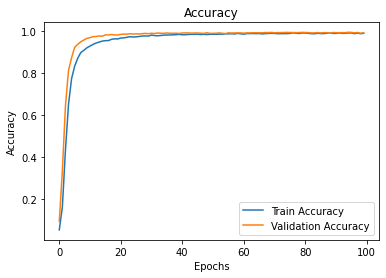

In [ ]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Loss

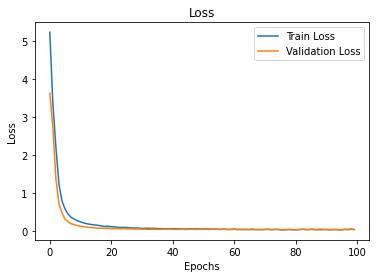

In [ ]:
plt.figure(0)
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Model performance on test dataset

## Prediction

In [ ]:
# Prediction
pred = model.predict_classes(X_test)
# Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  95.22565320665083


## Confusion matrix

In [ ]:
# Confusion matrix
cm = tf.math.confusion_matrix(labels=test_labels, predictions=pred).numpy()
cm

array([[ 48,   5,   0, ...,   0,   0,   0],
       [  0, 704,   2, ...,   1,   0,   0],
       [  0,  15, 720, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ...,  87,   0,   0],
       [  0,   0,   0, ...,   0,  48,   0],
       [  0,   0,   0, ...,   0,   4,  82]], dtype=int32)

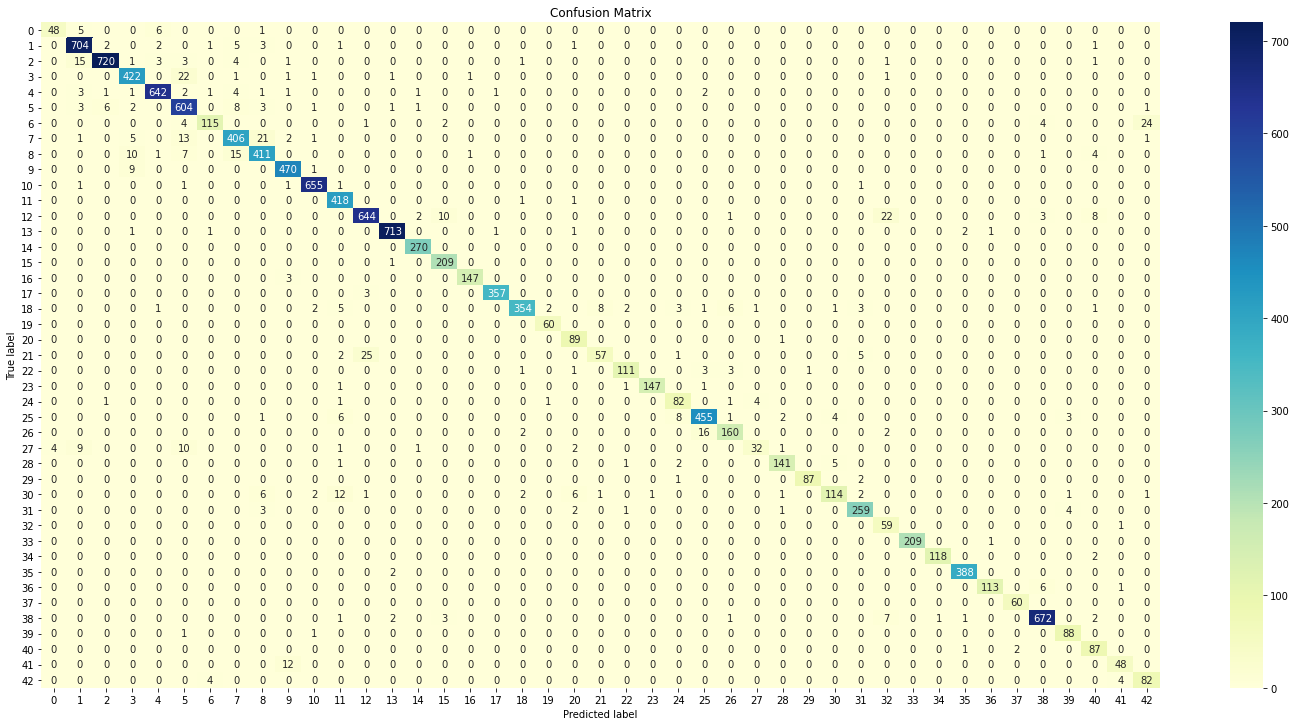

In [ ]:
# Plot confusion matrix
figure = plt.figure(figsize=(20, 10))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='.4g')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Visualization result

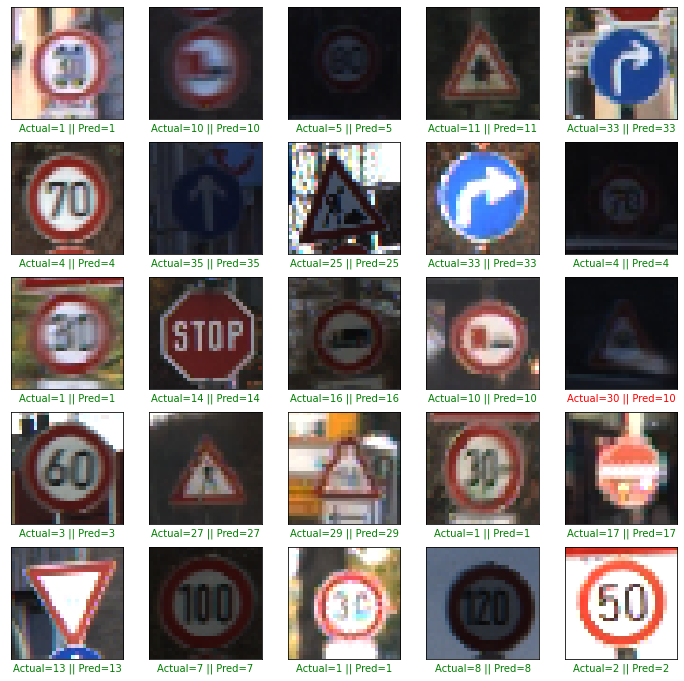

In [ ]:
plt.figure(figsize = (12, 12))

start_index = 100
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

True Label: Beware of ice/snow
Prediction: No passing for vehicles over 3.5 metric tons


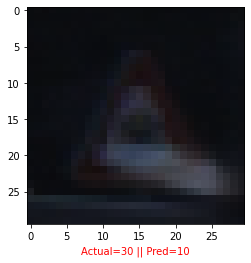

In [ ]:
plt.imshow(X_test[114])
plt.xlabel('Actual={} || Pred={}'.format(test_labels[114], pred[114]), color = 'r')
print('True Label:', classNames[test_labels[114]])
print('Prediction:', classNames[pred[114]])

#Save model

In [ ]:
# Chuyển đến thư mục cần lưu model
%cd '/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/Final Project '

/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/Final Project 


In [ ]:
# Lưu model dưới dạng file .h5
model.save('model-traffic-sign-recognition.h5')

#Load model & Predict

##Load model from drive

In [ ]:
load_model = tf.keras.models.load_model('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/Final Project /model-traffic-sign-recognition.h5')

## Prediction

In [ ]:
# Prediction image 60 in test set
result = load_model.predict(X_test[60:61])
result

array([[0.0000000e+00, 5.7233172e-38, 7.9559872e-23, 2.7721939e-28,
        8.0863921e-31, 3.1501497e-29, 1.7020590e-35, 0.0000000e+00,
        9.3525005e-33, 3.7327747e-34, 2.5834150e-37, 0.0000000e+00,
        1.8942451e-38, 1.1019328e-36, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 5.4610352e-32, 0.0000000e+00,
        1.4921894e-25, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 2.7490235e-30, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 2.6359277e-36, 0.0000000e+00,
        0.0000000e+00, 3.9552889e-37, 7.6908824e-22, 1.4433073e-27,
        5.7114623e-27, 1.5287201e-30, 1.0000000e+00, 1.3437591e-23,
        5.4606704e-21, 5.2213767e-27, 0.0000000e+00]], dtype=float32)

In [ ]:
# Predict name traffic sign
P = np.argmax(result)
Final = classNames[P]
Final

'Keep right'

'Keep right'

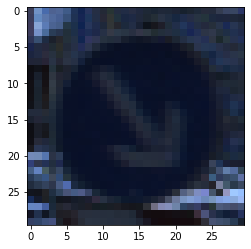

In [ ]:
# True label
plt.imshow(X_test[60])
classNames[test_labels[60]]